In [1]:
##script by @rikardoroa
## plotting Script using Python for Analytics

##these are all the Libraries for this exercise
from pyspark.sql.functions import*
from pyspark.sql import SparkSession as Session
from pyspark.sql.types import StructType, StructField, IntegerType, StringType
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl
from itertools import chain
import pyspark.sql as py


##creating the Class
class Plotting:
    
    # Init the variable
    def __init__(self, session = Session, PersonFile = pd.DataFrame,
                JsonSparkDataFrame = py.dataframe.DataFrame, Count_mothers=int, Count_fathers=int):
        #add the conventions
        ##With this line we create the Spark Session
        self.session = session.builder.master("spark://192.168.100.151:7077").appName("PlottingApp").getOrCreate()
        self.PersonFile = PersonFile
        self.JsonSparkDataFrame = JsonSparkDataFrame
        self.Count_fathers = Count_fathers
        self.Count_mothers = Count_mothers

        
    def Connect_session(self):
        ##call the conventions needed for this
        session = self.session
        
    def create_pandas_dataframe(self):
        ##just reading the Dataframe Here, as simple as that
        PersonFile = pd.read_excel(r"D:\DOCUMENTOS\CRUCES FINALES\FDATA.xlsx")

        ## we passed the convention here for the dataframe reading
        self.PersonFile = PersonFile
        return PersonFile.head()
    
    ##we need to inicialize the pandas Dataframe in the init method for the creation of json file    
    def create_json_file(self):
        ## also we need inicialize the spark session here too
        session = self.session
        PersonFile = self.PersonFile
        PersonSparkDataframe = session.createDataFrame(PersonFile)##we need to create a Spark Dataframe
        ##now the creation of the JsonFile
        PersonJsonFile = PersonSparkDataframe.write.format("json").option("header", "true").mode("overwrite").save("PersonJsonFile")
        return PersonJsonFile
        
    def read_json_file(self):
        session = self.session
        PersonJsonData = session.read.format("json").option("header", "true").load("PersonJsonFile")
        self.JsonSparkDataFrame = PersonJsonData
        return PersonJsonData.show(5)
                                   
    def filtering_json_file_parents(self):
        JsonSparkDataFrame = self.JsonSparkDataFrame
        Parents = JsonSparkDataFrame.filter(col("PARENTESCO")=="PADRE").count()
        self.Count_fathers = Parents
        return Parents
                                  
    def filtering_json_file_mothers(self):
        JsonSparkDataFrame = self.JsonSparkDataFrame
        Mothers = JsonSparkDataFrame.filter(col("PARENTESCO")=="MADRE").count()
        self.Count_mothers = Mothers
        return Mothers
    
    def plotting(self):
        Parents = self.Count_fathers
        Mothers = self.Count_mothers
        label = ["Population"]
        width = 1
        x = np.arange(len(label))
        myfig = ptl.figure(figsize=(5,7))
        plot = myfig.subplots()
        rect1 = plot.bar(x-width/2,Parents,label="Parents")
        rect2 = plot.bar(x+width/2,Mothers,label="Mothers")
        plot.set_ylabel('Quantity')
        plot.set_title('Total by Parent')
        plot.set_xticks(x)
        plot.set_xticklabels(label)
        plot.legend()
        for rect in chain(rect1,rect2):
            height = rect.get_height()
            plot.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0,2),  
                          textcoords="offset points",ha='center', va='bottom')
        return ptl.show()
        
        
        
           

+--------------+---------------+-----------+---------+---------+----------------------+--------------------+--------------------+--------+--------+-------------------+-------------------+----------+
|   APELLIDOS_B|    APELLIDOS_T|AUXILIO_100|CATEGORIA|   ESTADO|FECHA DE FALLECIMIENTO|    FECHA DE TRAMITE|       Fecha_RAD_SUB|    ID_B|    ID_T|          NOMBRES_B|          NOMBRES_T|PARENTESCO|
+--------------+---------------+-----------+---------+---------+----------------------+--------------------+--------------------+--------+--------+-------------------+-------------------+----------+
|MARTINEZ BRAVO|     ASBEL JOSE|        NaN|        A|FALLECIDO|  2015-12-15T00:00:...|2020-05-26T00:00:...|2020-05-26T00:00:...|26038022|15665771|CONCEPCION DE JESUS| BENAVIDES MARTINEZ|     MADRE|
|RUIZ DE OTERO |     OTERO RUIZ|   100000.0|        A|FALLECIDO|  2020-03-21T00:00:...|2020-05-26T00:00:...|2020-05-26T00:00:...|26158616|26160303|      MARIA CECILIA|YULIDETH DEL CARMEN|     MADRE|
|  PE

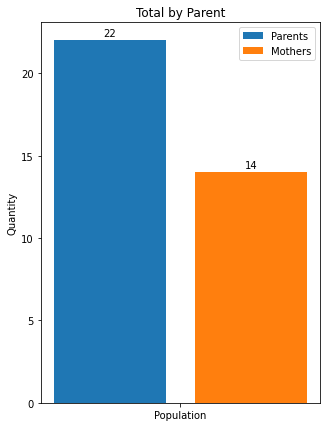

In [2]:
plotting = Plotting()
plotting.Connect_session()
plotting.create_pandas_dataframe()
plotting.create_json_file()
plotting.read_json_file()
plotting.filtering_json_file_parents()
plotting.filtering_json_file_mothers()
plotting.plotting()